In [20]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, SelectMultiple
import pyarrow.parquet as pq
from pathlib import Path
NUM_EVENTS = 100000
meta_path = Path('../data/filtered_meta_batch_1.parquet')
data_path = Path('../data/augmented_data_df.parquet')

original_meta_path = Path('../data/train_meta_batch_1.parquet')
original_data_path = Path('../data/batch_1.parquet')

meta_table = pq.read_table(meta_path)
data_table = pq.read_table(data_path)
original_meta_table = pq.read_table(original_meta_path)
original_data_table = pq.read_table(original_data_path)

meta_df = meta_table.to_pandas()
data_df = data_table.to_pandas()
original_meta_df = original_meta_table.to_pandas()
original_data_df = original_data_table.to_pandas()

# Reset the index to make 'event_id' a regular column
data_df.reset_index(inplace=True)
original_data_df.reset_index(inplace=True)

print(meta_df.head())
print("Length of DataFrame:", len(meta_df))
print(data_df.head(10))
print(f' Keys in data: {data_df.columns.tolist()}')
print(f' First 10 rows of data with augmented features:\n{data_df[(data_df["late_pulse"] == True) | (data_df["after_pulse"] == True) | (data_df["noise"] == True)].head(10)}')


   batch_id  event_id  first_pulse_index  last_pulse_index   azimuth    zenith
0         1        24                  0                67  5.029555  2.087498
1         1        41                 68               123  0.417742  1.549686
2         1        59                124               164  1.160466  2.401942
3         1        67                165               320  5.845952  0.759054
4         1        72                321               389  0.653719  0.939117
Length of DataFrame: 100000
   index  event_id  sensor_id  time  charge  auxiliary  late_pulse  \
0      0        24       3918  5928   1.325       True       False   
1      1        24       3918  5972   0.175       True        True   
2      2        24       4157  6115   1.175       True       False   
3      3        24       3520  6492   0.925       True       False   
4      4        24       5041  6665   0.225       True       False   
5      5        24        860  6813   1.925      False       False   
6      6

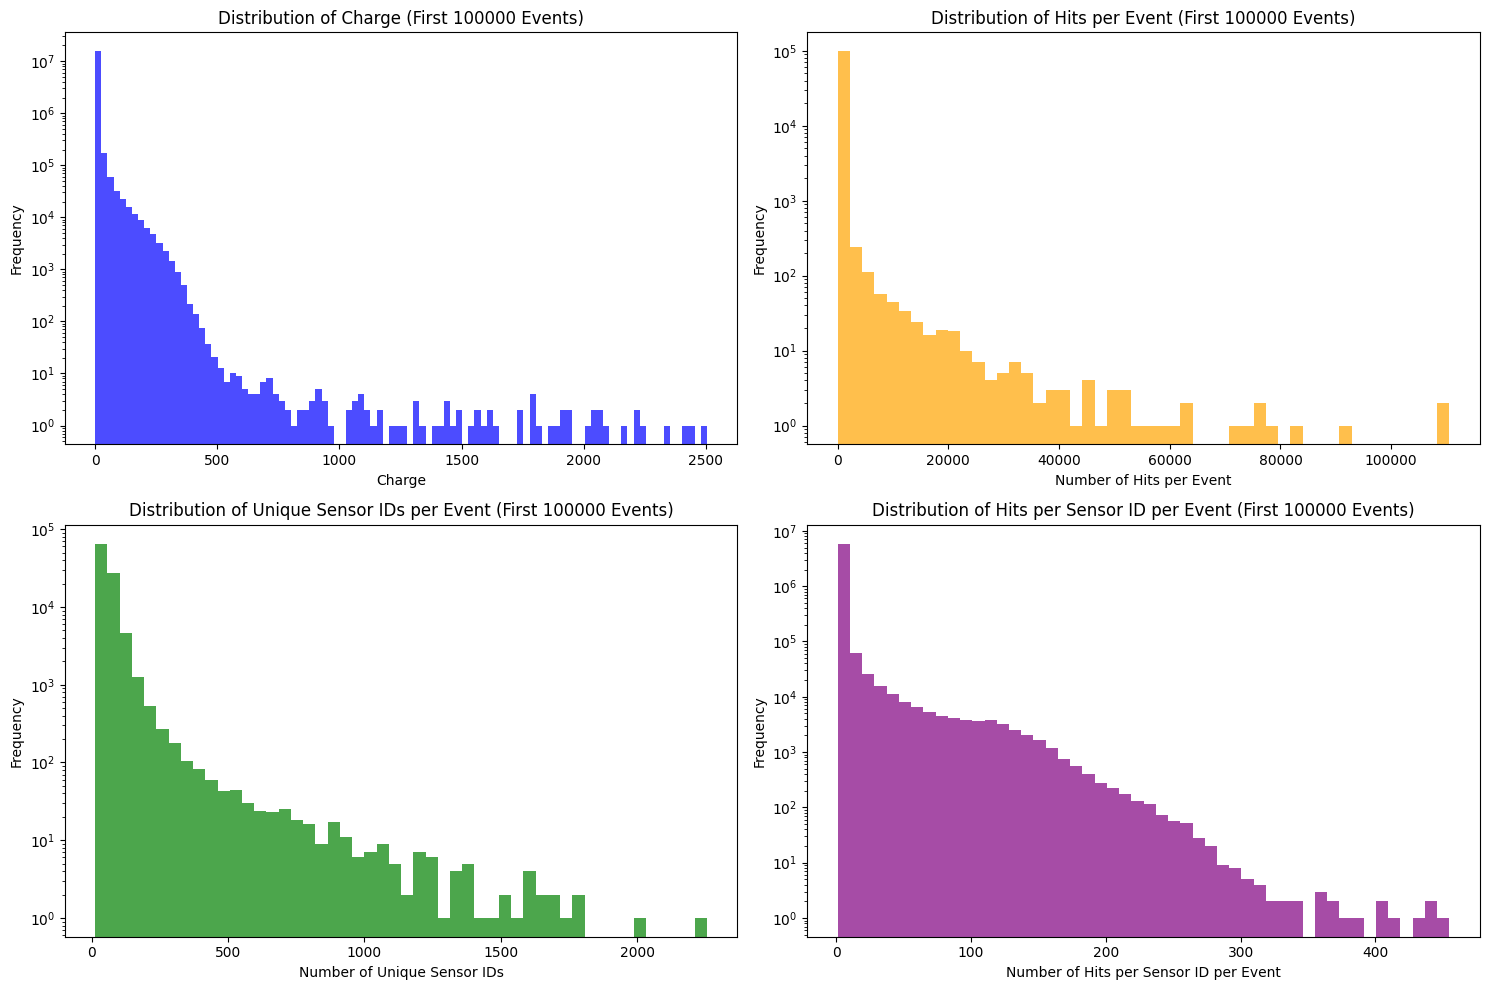

In [21]:
# Filter the data for the first NUM_EVENTS events
first_NUM_EVENTS_event_ids = original_meta_df['event_id'][:NUM_EVENTS]
filtered_data_df = original_data_df[original_data_df['event_id'].isin(first_NUM_EVENTS_event_ids)]

# Create a 2x2 grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Distribution of the charge
axes[0, 0].hist(filtered_data_df['charge'], bins=100, color='blue', alpha=0.7)
axes[0, 0].set_xlabel('Charge')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title(f'Distribution of Charge (First {NUM_EVENTS} Events)')
axes[0, 0].set_yscale('log')

# Plot 2: Distribution of the number of hits per event
hits_per_event = filtered_data_df['event_id'].value_counts().sort_index()
axes[0, 1].hist(hits_per_event, bins=50, color='orange', alpha=0.7)
axes[0, 1].set_xlabel('Number of Hits per Event')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title(f'Distribution of Hits per Event (First {NUM_EVENTS} Events)')
axes[0, 1].set_yscale('log')

# Plot 3: Distribution of the number of sensor_ids per event
sensor_counts = filtered_data_df.groupby('event_id')['sensor_id'].nunique()
axes[1, 0].hist(sensor_counts, bins=50, color='green', alpha=0.7)
axes[1, 0].set_xlabel('Number of Unique Sensor IDs')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title(f'Distribution of Unique Sensor IDs per Event (First {NUM_EVENTS} Events)')
axes[1, 0].set_yscale('log')

# Plot 4: Distribution of the number of hits per sensor_id per event
hits_per_sensor_event = filtered_data_df.groupby(['event_id', 'sensor_id']).size()
axes[1, 1].hist(hits_per_sensor_event, bins=50, color='purple', alpha=0.7)
axes[1, 1].set_xlabel('Number of Hits per Sensor ID per Event')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title(f'Distribution of Hits per Sensor ID per Event (First {NUM_EVENTS} Events)')
axes[1, 1].set_yscale('log')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

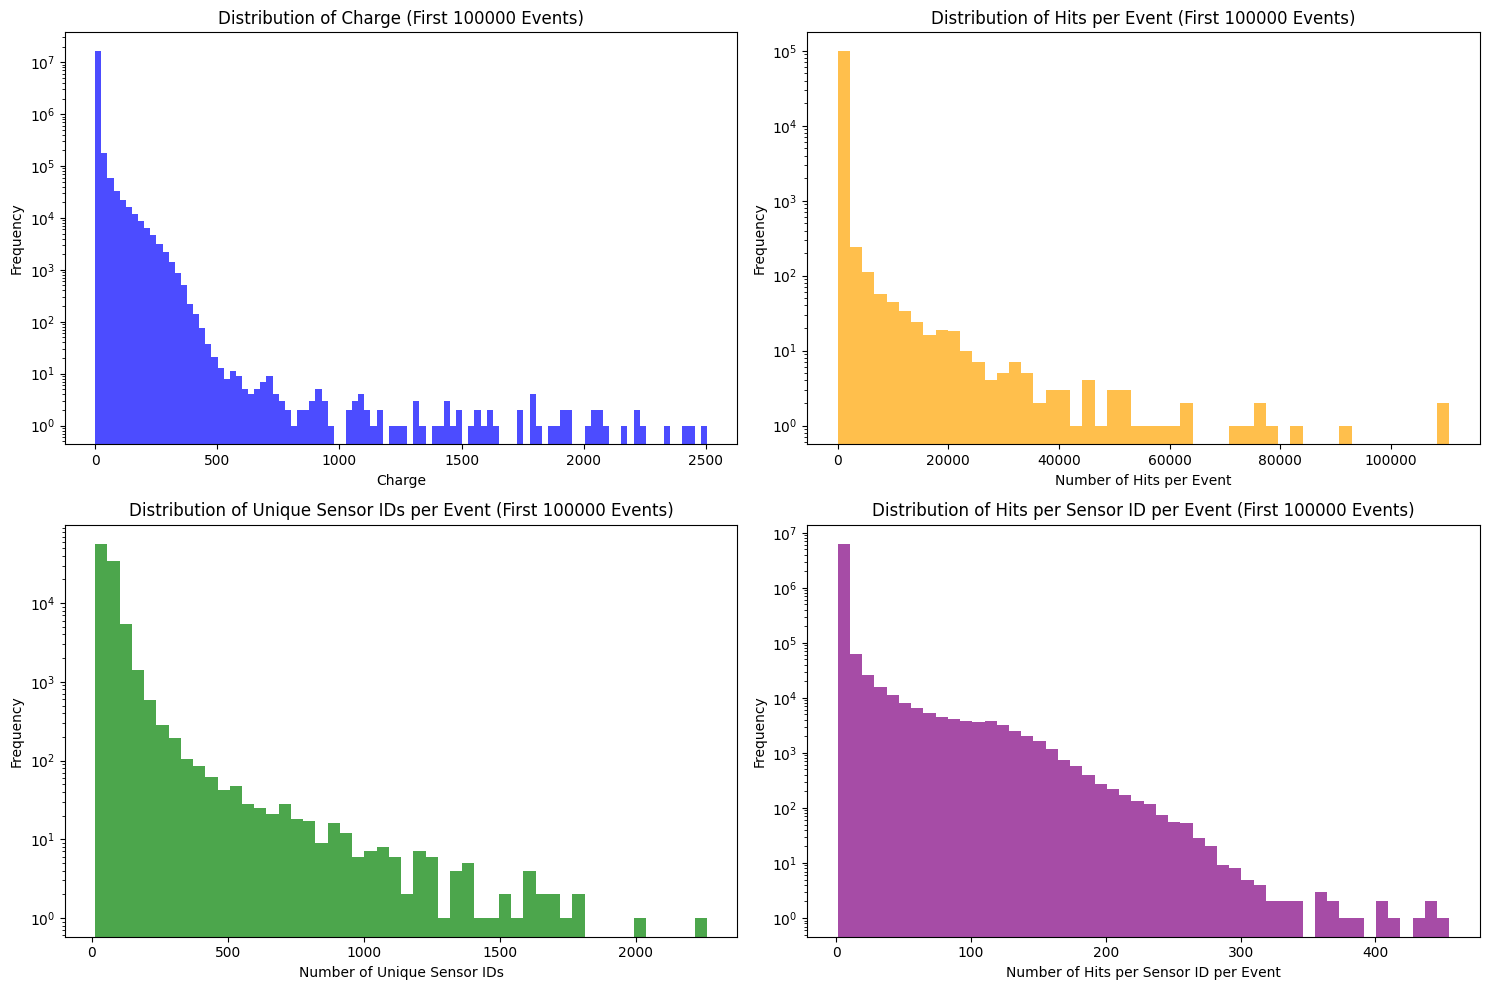

In [22]:
# Filter the data for the first NUM_EVENTS events
first_NUM_EVENTS_event_ids = meta_df['event_id'][:NUM_EVENTS]
filtered_data_df_mod = data_df[data_df['event_id'].isin(first_NUM_EVENTS_event_ids)]

# Create a 2x2 grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Distribution of the charge
axes[0, 0].hist(filtered_data_df_mod['charge'], bins=100, color='blue', alpha=0.7)
axes[0, 0].set_xlabel('Charge')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title(f'Distribution of Charge (First {NUM_EVENTS} Events)')
axes[0, 0].set_yscale('log')

# Plot 2: Distribution of the number of hits per event
hits_per_event_mod = filtered_data_df_mod['event_id'].value_counts().sort_index()
axes[0, 1].hist(hits_per_event_mod, bins=50, color='orange', alpha=0.7)
axes[0, 1].set_xlabel('Number of Hits per Event')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title(f'Distribution of Hits per Event (First {NUM_EVENTS} Events)')
axes[0, 1].set_yscale('log')

# Plot 3: Distribution of the number of sensor_ids per event
sensor_counts_mod = filtered_data_df_mod.groupby('event_id')['sensor_id'].nunique()
axes[1, 0].hist(sensor_counts_mod, bins=50, color='green', alpha=0.7)
axes[1, 0].set_xlabel('Number of Unique Sensor IDs')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title(f'Distribution of Unique Sensor IDs per Event (First {NUM_EVENTS} Events)')
axes[1, 0].set_yscale('log')

# Plot 4: Distribution of the number of hits per sensor_id per event
hits_per_sensor_event_mod = filtered_data_df_mod.groupby(['event_id', 'sensor_id']).size()
axes[1, 1].hist(hits_per_sensor_event_mod, bins=50, color='purple', alpha=0.7)
axes[1, 1].set_xlabel('Number of Hits per Sensor ID per Event')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title(f'Distribution of Hits per Sensor ID per Event (First {NUM_EVENTS} Events)')
axes[1, 1].set_yscale('log')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

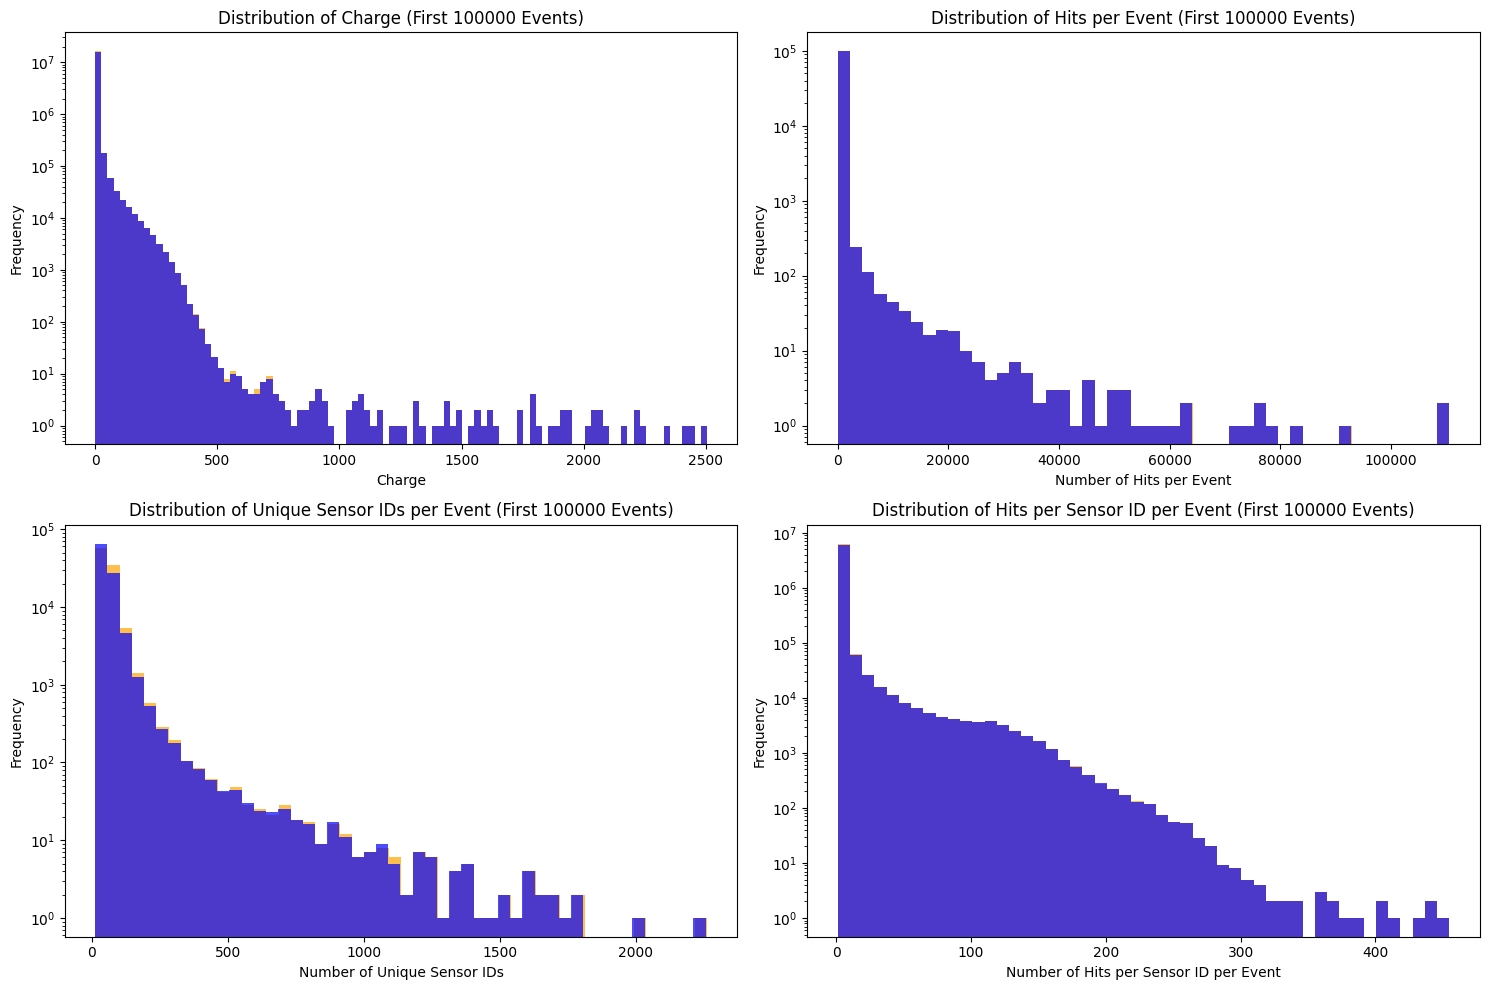

In [23]:
# Create a 2x2 grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Distribution of the charge
axes[0, 0].hist(filtered_data_df_mod['charge'], bins=100, color='orange', alpha=0.7)
axes[0, 0].hist(filtered_data_df['charge'], bins=100, color='blue', alpha=0.7)
axes[0, 0].set_xlabel('Charge')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title(f'Distribution of Charge (First {NUM_EVENTS} Events)')
axes[0, 0].set_yscale('log')

# Plot 2: Distribution of the number of hits per event
axes[0, 1].hist(hits_per_event_mod, bins=50, color='orange', alpha=0.7)
axes[0, 1].hist(hits_per_event, bins=50, color='blue', alpha=0.7)
axes[0, 1].set_xlabel('Number of Hits per Event')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title(f'Distribution of Hits per Event (First {NUM_EVENTS} Events)')
axes[0, 1].set_yscale('log')

# Plot 3: Distribution of the number of sensor_ids per event
axes[1, 0].hist(sensor_counts_mod, bins=50, color='orange', alpha=0.7)
axes[1, 0].hist(sensor_counts, bins=50, color='blue', alpha=0.7)
axes[1, 0].set_xlabel('Number of Unique Sensor IDs')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title(f'Distribution of Unique Sensor IDs per Event (First {NUM_EVENTS} Events)')
axes[1, 0].set_yscale('log')

# Plot 4: Distribution of the number of hits per sensor_id per event
axes[1, 1].hist(hits_per_sensor_event_mod, bins=50, color='orange', alpha=0.7)
axes[1, 1].hist(hits_per_sensor_event, bins=50, color='blue', alpha=0.7)
axes[1, 1].set_xlabel('Number of Hits per Sensor ID per Event')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title(f'Distribution of Hits per Sensor ID per Event (First {NUM_EVENTS} Events)')
axes[1, 1].set_yscale('log')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

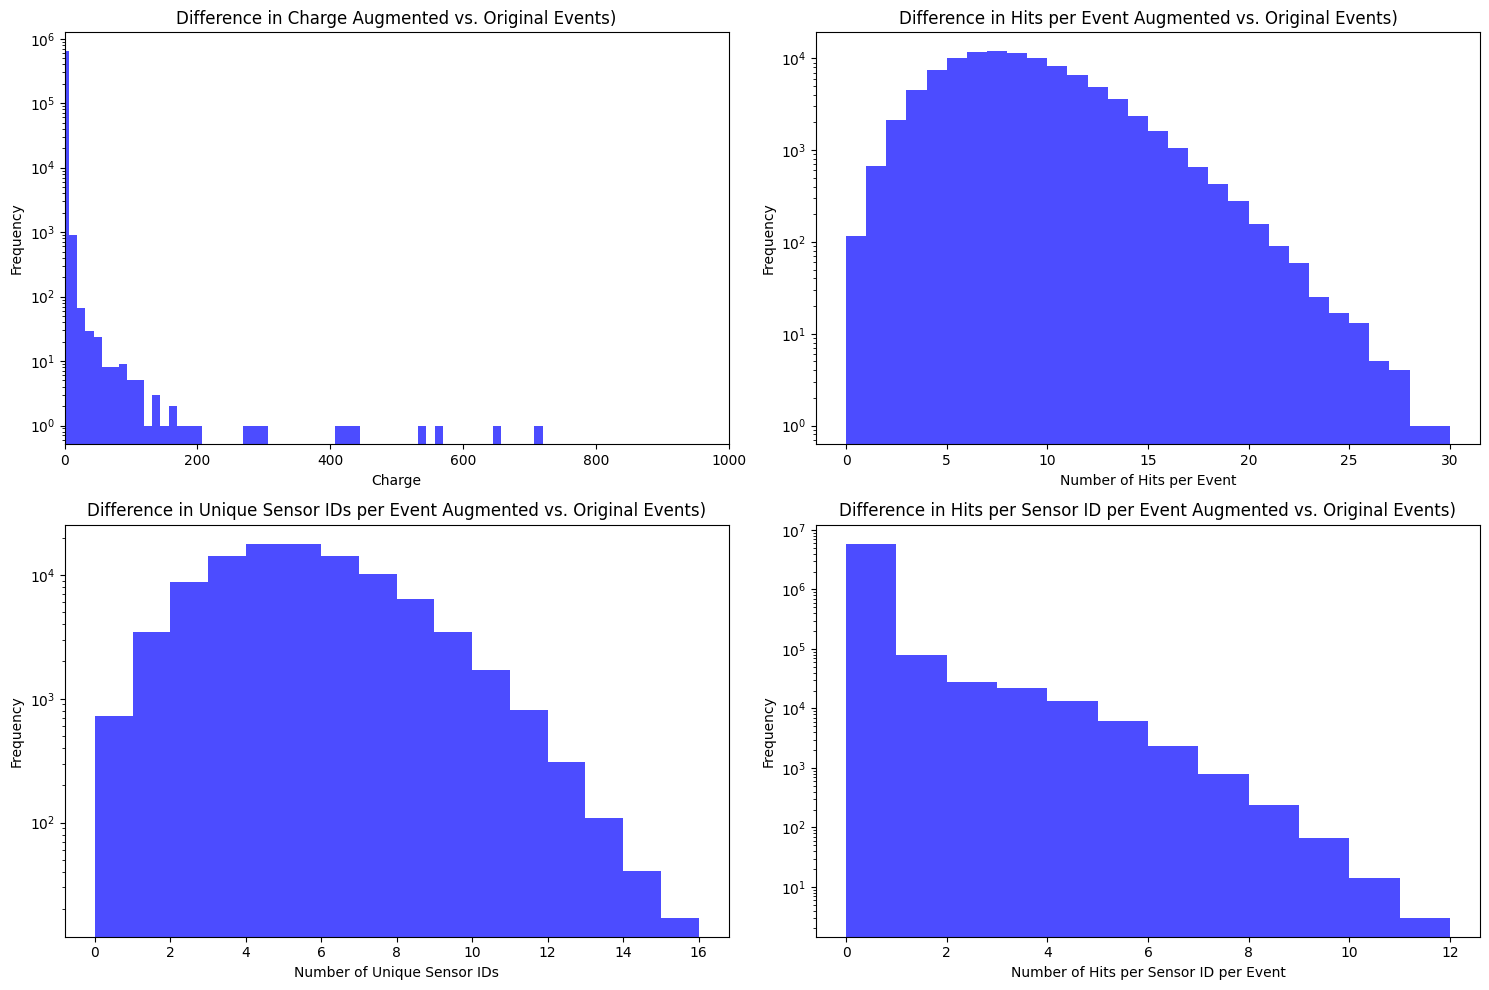

In [35]:
# Create a 2x2 grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Distribution of the charge
# Compute histograms for charge distributions
hist_orig, bins = np.histogram(filtered_data_df['charge'], bins=200, range=(filtered_data_df['charge'].min(), filtered_data_df['charge'].max()))
hist_mod, _ = np.histogram(filtered_data_df_mod['charge'], bins=bins)

# Subtract histograms
hist_diff = hist_mod - hist_orig

# Plot the difference histogram
axes[0, 0].bar(bins[:-1], hist_diff, width=np.diff(bins), color='blue', alpha=0.7)
axes[0, 0].set_xlabel('Charge')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title(f'Difference in Charge Augmented vs. Original Events)')
axes[0, 0].set_yscale('log')
axes[0, 0].set_xlim(0, 1000)

# Plot 2: Distribution of the number of hits per event
axes[0, 1].hist(hits_per_event_mod - hits_per_event, bins=30, color='blue', alpha=0.7)
axes[0, 1].set_xlabel('Number of Hits per Event')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title(f'Difference in Hits per Event Augmented vs. Original Events)')
axes[0, 1].set_yscale('log')

# Plot 3: Distribution of the number of sensor_ids per event
axes[1, 0].hist(sensor_counts_mod - sensor_counts, bins=16, color='blue', alpha=0.7)
axes[1, 0].set_xlabel('Number of Unique Sensor IDs')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title(f'Difference in Unique Sensor IDs per Event Augmented vs. Original Events)')
axes[1, 0].set_yscale('log')

# Plot 4: Distribution of the number of hits per sensor_id per event
axes[1, 1].hist(hits_per_sensor_event_mod - hits_per_sensor_event, bins=12, color='blue', alpha=0.7)
axes[1, 1].set_xlabel('Number of Hits per Sensor ID per Event')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title(f'Difference in Hits per Sensor ID per Event Augmented vs. Original Events)')
axes[1, 1].set_yscale('log')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [25]:
# Percentage of auxiliary hits that are False
auxiliary_false_percentage = (data_df['auxiliary'] == False).mean() * 100
auxiliary_false_percentage_orig = (original_data_df['auxiliary'] == False).mean() * 100
print(f'Percentage of auxiliary hits that are False: {auxiliary_false_percentage:.2f}%')
print(f'Difference between original and modified data: {auxiliary_false_percentage - auxiliary_false_percentage_orig:.4f}%')

Percentage of auxiliary hits that are False: 71.89%
Difference between original and modified data: 0.0702%
